In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [5]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [32]:
INIT_LR = 1e-4 #Learning Rate
EPOCHS = 20 #number of epochs
BS = 32 #batch size

In [33]:
DIRECTORY = r"D:\\Work\\Verzeo Intern\\AI\\Minor Project\\dataset"
CATEGORIES = ['with_mask','without_mask']
print('[INFO] loading images...')

[INFO] loading images...


In [34]:
data = []       #to append all the image arrays
labels = []     #corresponding lables - with or without mask

In [35]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):     #list all the images in the particular directory
        img_path = os.path.join(path,img)
        image = load_img(img_path, target_size = (224,224))    #converting all the image to a common size
        image = img_to_array(image)
        image = preprocess_input(image)     #for using mobilenets
        
        data.append(image)
        labels.append(category)
labels

['with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with

In [36]:
#To perform one hot encoder on labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [37]:
#Convert into numpy array
data = np.array(data,dtype = 'float32')
labels = np.array(labels)
type(labels)

numpy.ndarray

In [38]:
train_X, test_X, train_y, test_y = train_test_split(data,labels,test_size=0.2,stratify = labels, random_state = 42)

In [39]:
#Construct the training image generator for data augmentation, i.e creates various image from a single image and thus we increats the dataset

aug = ImageDataGenerator(rotation_range=20,
                        zoom_range=0.15,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.15,
                        horizontal_flip=True,
                        fill_mode='nearest')

In [40]:
#load the mobilenetv2, ensuring the head FC layer sets are left off
baseModel = MobileNetV2(weights='imagenet', include_top=False,
                       input_tensor = Input(shape=(224,224,3)))

D:\Softwares\Anaconda\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 303s 32us/step


In [42]:
#construct the head model that will be placed on top of the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten(name='flatten')(headModel)
headModel = Dense(128,activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2,activation='softmax')(headModel)

In [43]:
#actual model to train = FC model on top of base model
model = Model(inputs=baseModel.input, outputs=headModel)

In [44]:
#loop over all layers in the base model and freeze them so that they will not be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

In [45]:
#compile the model
opt = Adam(lr=INIT_LR, decay = INIT_LR/EPOCHS)
model.compile(loss='binary_crossentropy',optimizer = opt, metrics = ['accuracy'])

In [47]:
#train the head of the network
H = model.fit(aug.flow(train_X, train_y, batch_size = BS),
             steps_per_epoch=len(train_X)//BS,
             validation_data=(test_X,test_y),
             validation_steps=len(test_X)//BS,
             epochs = EPOCHS)

  ...
    to  
  ['...']
Train for 34 steps, validate on 276 samples
Epoch 1/20
34/34 [==============================] - 131s 4s/step - loss: 0.6531 - accuracy: 0.6608 - val_loss: 0.3229 - val_accuracy: 0.9062
Epoch 2/20
34/34 [==============================] - 138s 4s/step - loss: 0.3825 - accuracy: 0.8399 - val_loss: 0.1966 - val_accuracy: 0.9531
Epoch 3/20
34/34 [==============================] - 129s 4s/step - loss: 0.2835 - accuracy: 0.8914 - val_loss: 0.1339 - val_accuracy: 0.9688
Epoch 4/20
34/34 [==============================] - 129s 4s/step - loss: 0.2320 - accuracy: 0.9129 - val_loss: 0.1114 - val_accuracy: 0.9727
Epoch 5/20
34/34 [==============================] - 129s 4s/step - loss: 0.1916 - accuracy: 0.9251 - val_loss: 0.0857 - val_accuracy: 0.9766
Epoch 6/20
34/34 [==============================] - 131s 4s/step - loss: 0.1786 - accuracy: 0.9301 - val_loss: 0.0832 - val_accuracy: 0.9727
Epoch 7/20
34/34 [==============================] - 7852s 231s/step - loss: 0.1624 - 

In [48]:
#make predictions on the testing set
pred_y = model.predict(test_X, batch_size=BS)

In [50]:
#for each image in the testing set, index of the needs to be found that corresponds to the largest predicted probability
pred_index = np.argmax(pred_y, axis = 1)

In [52]:
#classification report
print('Claasification Report\n')
print(classification_report(test_y.argmax(axis=1),pred_index,target_names=lb.classes_))

Claasification Report

              precision    recall  f1-score   support

   with_mask       0.97      1.00      0.99       138
without_mask       1.00      0.97      0.99       138

    accuracy                           0.99       276
   macro avg       0.99      0.99      0.99       276
weighted avg       0.99      0.99      0.99       276



In [53]:
#serialise the model to the disk
model.save('mask_detector.model',save_format='h5')

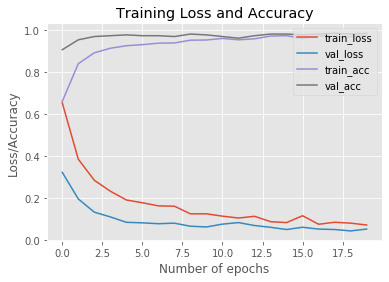

In [57]:
#plotting training loss and accuracy
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,EPOCHS),H.history['loss'],label='train_loss')
plt.plot(np.arange(0,EPOCHS),H.history['val_loss'],label='val_loss')
plt.plot(np.arange(0,EPOCHS),H.history['accuracy'],label='train_acc')
plt.plot(np.arange(0,EPOCHS),H.history['val_accuracy'],label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='upper right')
plt.savefig('AccuracyPlot.png')